In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

pd.set_option('display.float_format','{:,.5f}'.format)
pd.set_option('display.max_columns', None)
from IPython import display

C:\Users\Irinap\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5
rcParams['axes.titlepad'] = 1.5
rcParams['font.size'] = 8

In [4]:
from utils import *

In [5]:
description = pd.read_excel('data_set.xls', sheet_name='Описание полей')

In [6]:
description.head()

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...


In [7]:
df = pd.read_excel('data_set.xls', sheet_name='данные')

In [8]:
df.shape 

(15223, 52)

In [9]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,"5,000.00000",Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,"8,000.00000",6,"8,650.00000",0,1,220,18.00000,0,0,1,1,1,6,2,1,"1,580.00000","1,580.00000",nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,"21,650.00000",6,"4,000.00000",0,1,137,97.00000,1,0,1,1,1,6,1,1,"4,020.00000","4,020.00000",nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"9,000.00000",Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,"33,126.00000",12,"4,000.00000",0,1,251,84.00000,0,0,1,2,1,11,0,0,0.00000,0.00000,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"25,000.00000",Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8,491.82000",6,"5,000.00000",0,0,36,168.00000,1,1,1,1,1,6,3,1,"1,589.92333","1,590.00000",nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,"21,990.00000",12,"4,000.00000",0,1,83,101.00000,1,0,1,2,1,16,2,1,"1,152.15000","2,230.00000",nan


In [10]:
#df.info() 

In [11]:
df.TARGET.value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

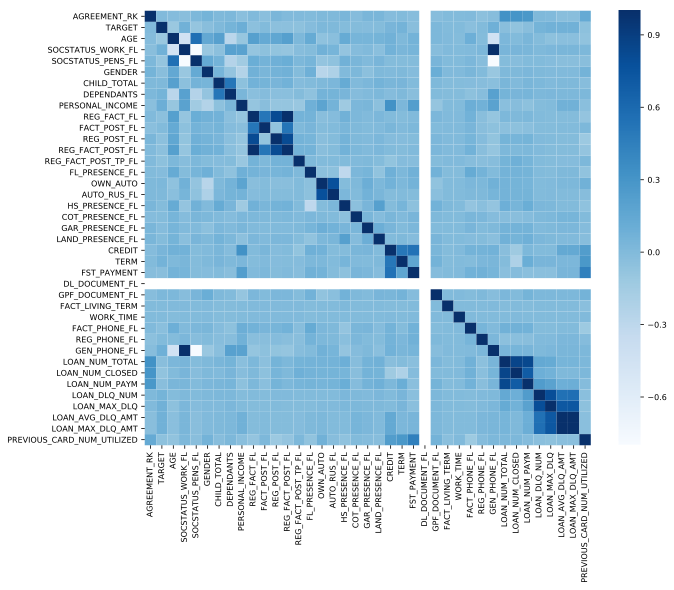

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

In [13]:
# pd.plotting.scatter_matrix(df[['AGE',
# 'SOCSTATUS_WORK_FL',
# 'SOCSTATUS_PENS_FL',
# 'GENDER',
# 'CHILD_TOTAL',
# 'DEPENDANTS',
# 'EDUCATION',
# 'MARITAL_STATUS']], 
#                    c=df['TARGET'], figsize=(15, 15),
#                    marker='o', hist_kwds={'bins': 20}, s=60,
#                    alpha=.8)

In [14]:
df.sort_values(by='AGREEMENT_RK', inplace=True)

In [15]:
len(set(df.AGREEMENT_RK))

15223

In [16]:
df.set_index('AGREEMENT_RK', inplace=True)

## Разбиение признаков по шкалам

In [17]:
# Выделяем числовые и бина/рные признаки

binary = [col for col in df.columns if (len(df[col].unique()) == 2) and (df[col].dtype != 'object') and (col != 'TARGET')]
linear = [col for col in df.columns if (df[col].dtype != 'object') and (col not in binary) and (col != 'TARGET')]
df_lin_bin = df[binary + linear + ['TARGET']]

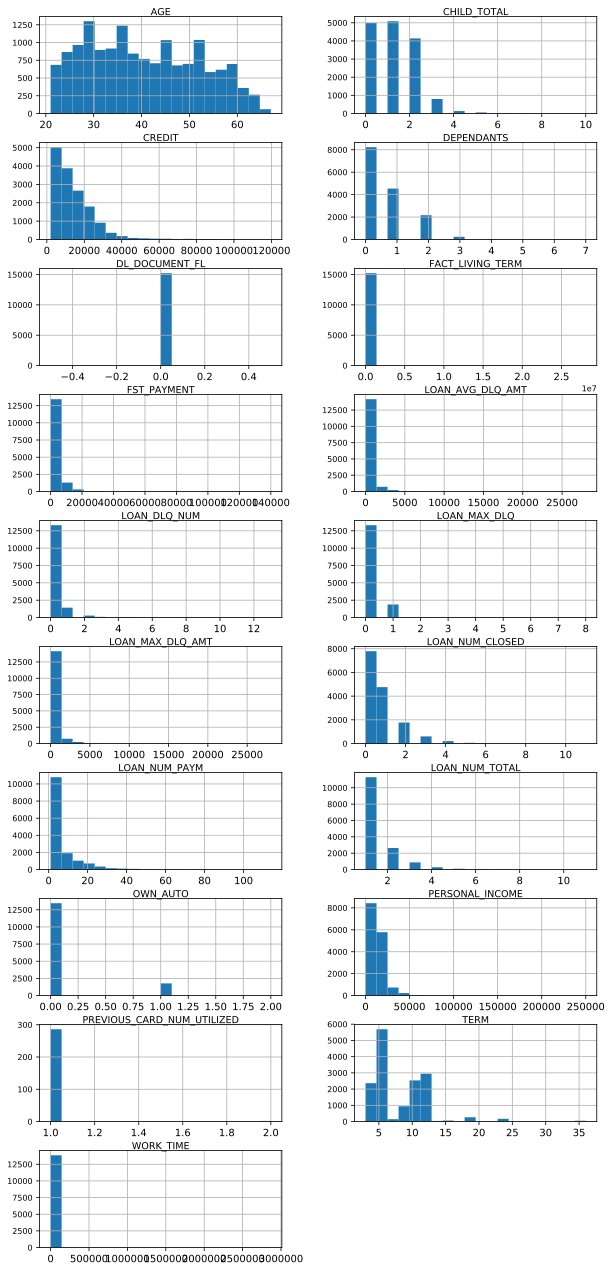

In [18]:
# Распределения признаков
df[linear].hist(figsize=(10,25), layout=(round(len(linear)/2)+1,2), xlabelsize=10, bins=20);

In [19]:
# Связь признаков и целевого оттока
#fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(16, 10))

#for idx, feat in  enumerate(linear):
#    sns.boxplot(x='TARGET', y=feat, data=df_lin, ax=np.newaxis([idx/4, idx%4]))
#    axes[idx / 4, idx % 4].legend()
#    axes[idx / 4, idx % 4].set_xlabel('TARGET')
#    axes[idx / 4, idx % 4].set_ylabel(feat)

### Убираем пропуски и выбросы

In [20]:
df_lin_bin.shape

(15223, 38)

In [21]:
df_lin_bin.columns.values

array(['SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'REG_FACT_FL',
       'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL',
       'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL',
       'LAND_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL',
       'REG_PHONE_FL', 'GEN_PHONE_FL', 'AGE', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'OWN_AUTO', 'CREDIT', 'TERM', 'FST_PAYMENT',
       'DL_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME',
       'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM',
       'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT',
       'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'TARGET'],
      dtype=object)

### Lasso + log reg

In [22]:
df_lin_bin_new = df_lin_bin.copy()
df_lin_bin_new.shape

(15223, 38)

In [23]:
df_lin_bin_new = df_lin_bin_new[df_lin_bin_new.columns[df_lin_bin_new.isnull().mean() < 0.9]]
df_lin_bin_new.shape

(15223, 37)

In [24]:
df_lin_bin_new = df_lin_bin_new.fillna(df_lin_bin_new.mean())

In [25]:
from sklearn.feature_selection import SelectFromModel


X = df_lin_bin_new.drop(['TARGET'], axis=1)
y = df_lin_bin_new['TARGET']

clf = LogisticRegression(C=0.46, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(15223, 29)

In [26]:
col_mask = model.get_support()
df_lin_bin_new = df_lin_bin_new.loc[:, col_mask]

In [27]:
cols = list(df_lin_bin_new.columns)
cols.append('TARGET')
cols

['SOCSTATUS_PENS_FL',
 'GENDER',
 'FACT_POST_FL',
 'REG_POST_FL',
 'REG_FACT_POST_FL',
 'REG_FACT_POST_TP_FL',
 'FL_PRESENCE_FL',
 'HS_PRESENCE_FL',
 'GAR_PRESENCE_FL',
 'GPF_DOCUMENT_FL',
 'FACT_PHONE_FL',
 'REG_PHONE_FL',
 'GEN_PHONE_FL',
 'AGE',
 'CHILD_TOTAL',
 'DEPENDANTS',
 'PERSONAL_INCOME',
 'OWN_AUTO',
 'TERM',
 'FST_PAYMENT',
 'FACT_LIVING_TERM',
 'WORK_TIME',
 'LOAN_NUM_TOTAL',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_PAYM',
 'LOAN_DLQ_NUM',
 'LOAN_MAX_DLQ',
 'LOAN_AVG_DLQ_AMT',
 'LOAN_MAX_DLQ_AMT',
 'TARGET']

In [28]:
df_lin_bin = df_lin_bin[cols]

In [29]:
df_lin_bin.columns.values.shape

(30,)

In [30]:
model.get_support().shape

(36,)

### Пропуски и выбросы

In [31]:
l = [col for col in df_lin_bin.columns if (len(df_lin_bin[col].unique()) != 2) and (col != 'TARGET')]

In [32]:
outliers_removed_index = remove_outliers(df_lin_bin[l])

In [33]:
outliers_removed = df_lin_bin.loc[outliers_removed_index]

In [34]:
outliers_removed.shape

(9559, 30)

In [35]:
outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9559 entries, 59912034 to 75292242
Data columns (total 30 columns):
SOCSTATUS_PENS_FL      9559 non-null int64
GENDER                 9559 non-null int64
FACT_POST_FL           9559 non-null int64
REG_POST_FL            9559 non-null int64
REG_FACT_POST_FL       9559 non-null int64
REG_FACT_POST_TP_FL    9559 non-null int64
FL_PRESENCE_FL         9559 non-null int64
HS_PRESENCE_FL         9559 non-null int64
GAR_PRESENCE_FL        9559 non-null int64
GPF_DOCUMENT_FL        9559 non-null int64
FACT_PHONE_FL          9559 non-null int64
REG_PHONE_FL           9559 non-null int64
GEN_PHONE_FL           9559 non-null int64
AGE                    9559 non-null int64
CHILD_TOTAL            9559 non-null int64
DEPENDANTS             9559 non-null int64
PERSONAL_INCOME        9559 non-null float64
OWN_AUTO               9559 non-null int64
TERM                   9559 non-null int64
FST_PAYMENT            9559 non-null float64
FACT_LIVING_TERM  

In [36]:
outliers_removed = outliers_removed.dropna()

In [37]:
outliers_removed.shape

(8605, 30)

In [38]:
outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8605 entries, 59912034 to 75292242
Data columns (total 30 columns):
SOCSTATUS_PENS_FL      8605 non-null int64
GENDER                 8605 non-null int64
FACT_POST_FL           8605 non-null int64
REG_POST_FL            8605 non-null int64
REG_FACT_POST_FL       8605 non-null int64
REG_FACT_POST_TP_FL    8605 non-null int64
FL_PRESENCE_FL         8605 non-null int64
HS_PRESENCE_FL         8605 non-null int64
GAR_PRESENCE_FL        8605 non-null int64
GPF_DOCUMENT_FL        8605 non-null int64
FACT_PHONE_FL          8605 non-null int64
REG_PHONE_FL           8605 non-null int64
GEN_PHONE_FL           8605 non-null int64
AGE                    8605 non-null int64
CHILD_TOTAL            8605 non-null int64
DEPENDANTS             8605 non-null int64
PERSONAL_INCOME        8605 non-null float64
OWN_AUTO               8605 non-null int64
TERM                   8605 non-null int64
FST_PAYMENT            8605 non-null float64
FACT_LIVING_TERM  

### Блок кластеризации

In [39]:
outliers_removed.head()

,SOCSTATUS_PENS_FL,GENDER,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,HS_PRESENCE_FL,GAR_PRESENCE_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,TARGET
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59912034,0,1,1,1,1,1,1,0,0,1,1,1,1,41,0,0,"6,000.00000",0,10,465.00000,204,6.00000,2,1,11,0,0,0.00000,0.00000,0
59912659,0,1,1,1,1,1,1,0,0,0,0,0,1,43,0,0,"7,000.00000",0,6,540.00000,279,72.00000,1,1,6,0,0,0.00000,0.00000,0
59912692,0,1,1,1,1,1,1,0,0,0,1,0,1,54,2,0,"19,000.00000",0,3,600.00000,240,120.00000,1,1,3,0,0,0.00000,0.00000,0
59913108,0,0,1,1,1,1,0,0,0,1,0,0,1,26,0,0,"18,000.00000",0,4,"8,389.00000",49,27.00000,2,1,13,0,0,0.00000,0.00000,1
59913395,0,1,1,1,1,1,0,1,0,1,1,0,1,38,0,1,"20,000.00000",0,5,"1,462.00000",89,120.00000,2,1,12,0,0,0.00000,0.00000,0


In [40]:
scaler = StandardScaler()
scaler.fit(outliers_removed[l])
outliers_removed[l] = scaler.transform(outliers_removed[l])

In [41]:
outliers_removed.head()

,SOCSTATUS_PENS_FL,GENDER,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,HS_PRESENCE_FL,GAR_PRESENCE_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,TARGET
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59912034,0,1,1,1,1,1,1,0,0,1,1,1,1,0.22776,-1.16986,-0.85442,-1.18201,0.00000,0.77230,-0.86847,0.39453,-0.52477,2.17376,0.68361,1.37653,0.00000,0.00000,0.00000,0.00000,0
59912659,0,1,1,1,1,1,1,0,0,0,0,0,1,0.41511,-1.16986,-0.85442,-1.01002,0.00000,-0.52321,-0.83956,0.79851,-0.08564,-0.46003,0.68361,0.05140,0.00000,0.00000,0.00000,0.00000,0
59912692,0,1,1,1,1,1,1,0,0,0,1,0,1,1.44550,1.16038,-0.85442,1.05389,0.00000,-1.49485,-0.81643,0.58844,0.23373,-0.46003,0.68361,-0.74367,0.00000,0.00000,0.00000,0.00000,0
59913108,0,0,1,1,1,1,0,0,0,1,0,0,1,-1.17732,-1.16986,-0.85442,0.88189,0.00000,-1.17097,2.18621,-0.44035,-0.38505,2.17376,0.68361,1.90658,0.00000,0.00000,0.00000,0.00000,1
59913395,0,1,1,1,1,1,0,1,0,1,1,0,1,-0.05325,-1.16986,0.51702,1.22588,0.00000,-0.84709,-0.48413,-0.22490,0.23373,2.17376,0.68361,1.64156,0.00000,0.00000,0.00000,0.00000,0


In [42]:
# Выбор A_cal_0
roc_auc, A_cal_0 = top_15_features(outliers_removed)

In [43]:
roc_auc

0.6733625730994153

In [44]:
A_cal_0 = A_cal_0 + ['GENDER']

In [45]:
len(A_cal_0)

16

In [46]:
A_cal_0

['GEN_PHONE_FL',
 'GAR_PRESENCE_FL',
 'WORK_TIME',
 'REG_POST_FL',
 'FST_PAYMENT',
 'REG_PHONE_FL',
 'REG_FACT_POST_TP_FL',
 'GPF_DOCUMENT_FL',
 'PERSONAL_INCOME',
 'FACT_POST_FL',
 'TERM',
 'SOCSTATUS_PENS_FL',
 'LOAN_NUM_CLOSED',
 'LOAN_NUM_PAYM',
 'AGE',
 'GENDER']

In [47]:
description[description["ПОЛЕ"] == 'REG_FACT_POST_TP_FL']

,ПОЛЕ,ОПИСАНИЕ
26,REG_FACT_POST_TP_FL,"область регистрации, фактического пребывания, ..."


## Метрические признаки

In [80]:
def make_metric_features(n_clusters, cluster_features, df):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[cluster_features])
    #labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    metric_features = pairwise_distances(df[cluster_features], kmeans.cluster_centers_)
    return cluster_centers, metric_features

In [81]:
# Задаем признаки, на которых будут построены кластеры
# и кол-во кластеров
n_clusters = 25
cluster_features = A_cal_0

In [82]:
cluster_centers, metric_features = make_metric_features(n_clusters, cluster_features, outliers_removed)

In [83]:
metric_features.shape

(8605, 25)

In [84]:
outliers_removed.head()

,GEN_PHONE_FL,GAR_PRESENCE_FL,WORK_TIME,REG_POST_FL,FST_PAYMENT,REG_PHONE_FL,REG_FACT_POST_TP_FL,GPF_DOCUMENT_FL,PERSONAL_INCOME,FACT_POST_FL,TERM,SOCSTATUS_PENS_FL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,AGE,GENDER,TARGET
AGREEMENT_RK,,,,,,,,,,,,,,,,,
59912034,1,0,-0.52477,1,-0.86847,1,1,1,-1.18201,1,0.77230,0,0.68361,1.37653,0.22776,1,0
59912659,1,0,-0.08564,1,-0.83956,0,1,0,-1.01002,1,-0.52321,0,0.68361,0.05140,0.41511,1,0
59912692,1,0,0.23373,1,-0.81643,0,1,0,1.05389,1,-1.49485,0,0.68361,-0.74367,1.44550,1,0
59913108,1,0,-0.38505,1,2.18621,0,1,1,0.88189,1,-1.17097,0,0.68361,1.90658,-1.17732,0,1
59913395,1,0,0.23373,1,-0.48413,0,1,1,1.22588,1,-0.84709,0,0.68361,1.64156,-0.05325,1,0


In [85]:
outliers_removed = pd.concat([outliers_removed, 
                              pd.DataFrame(metric_features, 
                               columns=["cluster_" + str(x) for x in range(1,n_clusters+1)], 
                               index=outliers_removed.index)], 
                             axis=1)

In [86]:
outliers_removed.head()

,GEN_PHONE_FL,GAR_PRESENCE_FL,WORK_TIME,REG_POST_FL,FST_PAYMENT,REG_PHONE_FL,REG_FACT_POST_TP_FL,GPF_DOCUMENT_FL,PERSONAL_INCOME,FACT_POST_FL,TERM,SOCSTATUS_PENS_FL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,AGE,GENDER,TARGET,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59912034,1,0,-0.52477,1,-0.86847,1,1,1,-1.18201,1,0.77230,0,0.68361,1.37653,0.22776,1,0,4.08625,3.73270,3.11873,3.01782,2.67199,4.00170,29.05091,1.97098,2.66540,4.38844,2.03587,5.33178,3.94633,4.00726,66.57514,4.56273,2.70402,3.44114,3.19737,3.13974,2.76580,2.85226,4.35622,3.25040,3.28089
59912659,1,0,-0.08564,1,-0.83956,0,1,0,-1.01002,1,-0.52321,0,0.68361,0.05140,0.41511,1,0,4.36836,3.03169,1.83589,1.82841,2.59446,2.94074,28.49639,2.94106,2.34521,3.37427,2.50039,4.68423,2.68895,2.85941,66.08009,4.18807,2.45554,3.16633,2.25260,1.28389,3.93562,2.57409,3.89773,2.81784,3.10133
59912692,1,0,0.23373,1,-0.81643,0,1,0,1.05389,1,-1.49485,0,0.68361,-0.74367,1.44550,1,0,5.01930,3.72256,3.11488,2.67305,4.19455,1.76472,28.08535,4.23955,3.61145,3.66847,4.20002,3.96769,2.46609,2.45168,65.77883,4.59169,3.59998,3.28879,3.33056,1.93759,5.33929,3.13845,3.51608,3.60391,3.97744
59913108,1,0,-0.38505,1,2.18621,0,1,1,0.88189,1,-1.17097,0,0.68361,1.90658,-1.17732,0,1,2.37517,3.27532,3.92930,4.68079,4.65852,4.22607,28.91063,4.09943,3.40106,3.10864,3.68298,3.35608,4.85094,3.55466,66.54488,3.83969,5.09090,4.58834,4.15403,4.46916,4.00994,3.90958,3.98134,5.20380,4.25304
59913395,1,0,0.23373,1,-0.48413,0,1,1,1.22588,1,-0.84709,0,0.68361,1.64156,-0.05325,1,0,3.41770,3.44029,3.00077,3.27210,3.70735,2.60736,28.16327,2.60257,2.20335,3.82206,2.74663,3.84866,3.29688,2.52834,65.82116,4.44834,3.82012,3.29902,3.12938,3.04185,3.07711,2.22544,3.02894,3.76631,3.39988


# Выбрала только доверительное множество A_cal_0

In [87]:
outliers_removed = outliers_removed[A_cal_0 + ['TARGET'] + ["cluster_" + str(x) for x in range(1,n_clusters+1)]]

## Разделение на train и test

In [88]:
outliers_removed.shape

(8605, 42)

In [89]:
outliers_removed.head()

,GEN_PHONE_FL,GAR_PRESENCE_FL,WORK_TIME,REG_POST_FL,FST_PAYMENT,REG_PHONE_FL,REG_FACT_POST_TP_FL,GPF_DOCUMENT_FL,PERSONAL_INCOME,FACT_POST_FL,TERM,SOCSTATUS_PENS_FL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,AGE,GENDER,TARGET,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59912034,1,0,-0.52477,1,-0.86847,1,1,1,-1.18201,1,0.77230,0,0.68361,1.37653,0.22776,1,0,4.08625,3.73270,3.11873,3.01782,2.67199,4.00170,29.05091,1.97098,2.66540,4.38844,2.03587,5.33178,3.94633,4.00726,66.57514,4.56273,2.70402,3.44114,3.19737,3.13974,2.76580,2.85226,4.35622,3.25040,3.28089
59912659,1,0,-0.08564,1,-0.83956,0,1,0,-1.01002,1,-0.52321,0,0.68361,0.05140,0.41511,1,0,4.36836,3.03169,1.83589,1.82841,2.59446,2.94074,28.49639,2.94106,2.34521,3.37427,2.50039,4.68423,2.68895,2.85941,66.08009,4.18807,2.45554,3.16633,2.25260,1.28389,3.93562,2.57409,3.89773,2.81784,3.10133
59912692,1,0,0.23373,1,-0.81643,0,1,0,1.05389,1,-1.49485,0,0.68361,-0.74367,1.44550,1,0,5.01930,3.72256,3.11488,2.67305,4.19455,1.76472,28.08535,4.23955,3.61145,3.66847,4.20002,3.96769,2.46609,2.45168,65.77883,4.59169,3.59998,3.28879,3.33056,1.93759,5.33929,3.13845,3.51608,3.60391,3.97744
59913108,1,0,-0.38505,1,2.18621,0,1,1,0.88189,1,-1.17097,0,0.68361,1.90658,-1.17732,0,1,2.37517,3.27532,3.92930,4.68079,4.65852,4.22607,28.91063,4.09943,3.40106,3.10864,3.68298,3.35608,4.85094,3.55466,66.54488,3.83969,5.09090,4.58834,4.15403,4.46916,4.00994,3.90958,3.98134,5.20380,4.25304
59913395,1,0,0.23373,1,-0.48413,0,1,1,1.22588,1,-0.84709,0,0.68361,1.64156,-0.05325,1,0,3.41770,3.44029,3.00077,3.27210,3.70735,2.60736,28.16327,2.60257,2.20335,3.82206,2.74663,3.84866,3.29688,2.52834,65.82116,4.44834,3.82012,3.29902,3.12938,3.04185,3.07711,2.22544,3.02894,3.76631,3.39988


In [90]:
X = outliers_removed.drop(['TARGET'], axis=1) 
y =outliers_removed['TARGET']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
y_test.value_counts(normalize=True)

0   0.88290
1   0.11710
Name: TARGET, dtype: float64

In [93]:
y_train.value_counts(normalize=True)

0   0.89090
1   0.10910
Name: TARGET, dtype: float64

In [94]:
X_train.shape, X_test.shape

((6453, 41), (2152, 41))

## Логистическая регрессия с использованием метрических признаков

In [95]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [96]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [97]:
print('AUC-ROC', roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6777464494569758
Gini 0.35549289891395164


In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

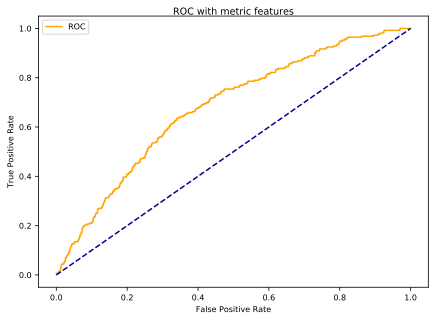

In [99]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

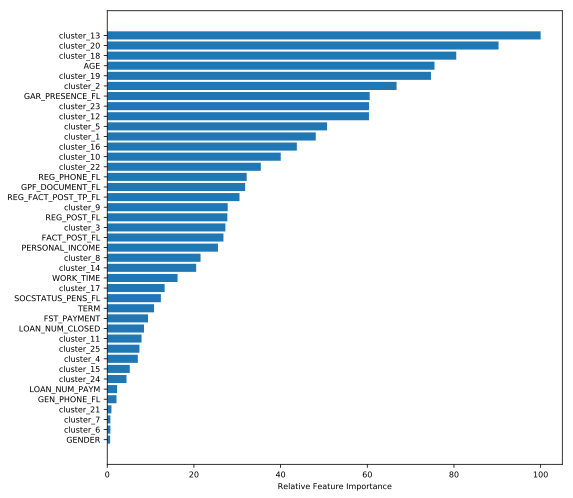

In [100]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(8, 7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()  

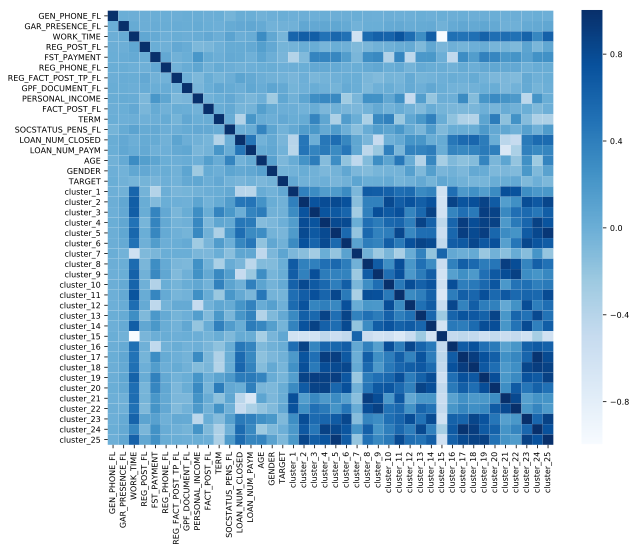

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(outliers_removed.corr(),cmap='Blues',annot=False) 

## Обучение модели с использованием ОПТИМАЛЬНОГО количества кластеров для построения метрических признаков

In [74]:
without_metric_feats = [col for col in outliers_removed.columns 
                        if col not in ["cluster_"+str(x) for x in range(1,n_clusters+1)]]

In [75]:
outliers_removed = outliers_removed[without_metric_feats]

In [72]:
roc_auc_scores = []
for n_clusters in range(1,50):
    metric_features = make_metric_features(n_clusters, cluster_features, outliers_removed)[1]
    df_new = pd.concat([outliers_removed, 
                        pd.DataFrame(metric_features, 
                               columns=["cluster_" + str(x) for x in range(1,n_clusters+1)], 
                               index=outliers_removed.index)], 
                       axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['TARGET'], axis=1), 
                                                        df_new['TARGET'], 
                                                        test_size=0.25, 
                                                        random_state=42)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test, y_scores))

In [136]:
roc_auc_scores.index(max(roc_auc_scores))+1

40

Text(0.5,1,'Зависимость ROC от количества кластеров')

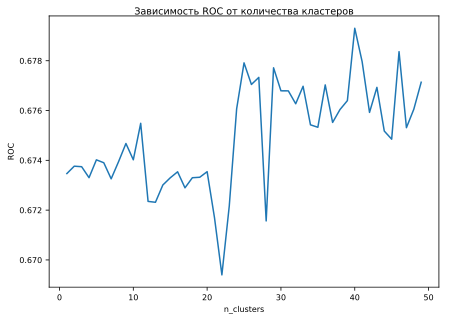

In [74]:
plt.plot([n for n in range(1,len(roc_auc_scores)+1)], roc_auc_scores, label='ROC')
plt.xlabel('n_clusters')
plt.ylabel('ROC')
plt.title('Зависимость ROC от количества кластеров')

## Рассчет матриц дисперсий

In [142]:
clf.coef_

array([[ 0.01856019, -0.5276591 , -0.14137787, -0.24143624, -0.08194375,
        -0.28032778, -0.26592854,  0.2772038 ,  0.22258055,  0.23360971,
        -0.09416619, -0.1078478 ,  0.07392273,  0.01978855, -0.65799768,
        -0.00584427,  0.41924456,  0.58170591,  0.23751624,  0.06143086,
         0.4418874 , -0.00629907,  0.00630765, -0.18756003,  0.24217644,
         0.34882144, -0.06894556, -0.52619109,  0.8713666 ,  0.17878448,
        -0.04527135, -0.38117784, -0.11539854, -0.70165106, -0.65088119,
        -0.78672395,  0.00842165, -0.30872684,  0.52624861, -0.03870233,
        -0.06471684]])

In [143]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['feature', 'weight']

In [144]:
coefficients.sort_values(by='weight', ascending=False, inplace=True)

In [145]:
coefficients['variance'] = coefficients['weight']*coefficients['weight']/len(coefficients)

In [146]:
coefficients.sort_values('variance', ascending=False)

,feature,weight,variance
28,cluster_13,0.87137,0.01852
35,cluster_20,-0.78672,0.01510
33,cluster_18,-0.70165,0.01201
14,AGE,-0.65800,0.01056
34,cluster_19,-0.65088,0.01033
17,cluster_2,0.58171,0.00825
1,GAR_PRESENCE_FL,-0.52766,0.00679
38,cluster_23,0.52625,0.00675
27,cluster_12,-0.52619,0.00675
20,cluster_5,0.44189,0.00476


In [158]:
v = pd.concat([pd.DataFrame(X_test.index),pd.DataFrame(np.transpose(y_scores))], axis = 1)

In [171]:
v

,AGREEMENT_RK,score
0,73822653,0.10563
1,67539748,0.12472
2,67334918,0.06041
3,65414249,0.13056
4,66743229,0.12494
5,62132443,0.17229
6,66760610,0.12838
7,60036992,0.06315
8,60041507,0.04905
9,75214244,0.11057


## Категориальные признаки

In [307]:
categories = [col for col in df.columns if df[col].dtype == 'object']

In [308]:
categories

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'FAMILY_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM']

In [309]:
df[categories] = df[categories].fillna('Unknown')

In [310]:
label_enc_cols = [col for col in categories if len(df[col].unique()) >= 10]
ohe_enc_cols = [col for col in categories if len(df[col].unique()) <= 10]

In [311]:
df[categories].head()

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ
1,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ
2,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ
3,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ
4,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ


In [312]:
d = {}
for col in label_enc_cols: #+ ohe_enc_cols:
    transformer = LabelEncoder()
    transformer.fit(df[col])
    d[col] = transformer
    
    df[col] = transformer.transform(df[col])

In [313]:
df[label_enc_cols].head()

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,24,7,3,46,46,45,41,4
1,24,7,9,19,19,18,55,11
2,5,12,9,18,18,17,17,1
3,14,10,9,52,52,51,47,11
4,2,12,9,19,19,18,55,11


In [314]:
# ohe = OneHotEncoder()

# ohe.fit(df[ohe_enc_cols])

# pd.concat([df, pd.DataFrame(ohe.transform(df[ohe_enc_cols]).todense())], axis=1)

# ohe.transform(df[ohe_enc_cols])

In [315]:
# Когда придут новые данные, если сделать тот же гет дамис, может быть больше (или меньше) колонок, чем на трейне
df = pd.get_dummies(df, columns=ohe_enc_cols, dummy_na=True, sparse=False)

In [316]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [317]:
df.shape

(15223, 76)

## Метрические признаки

In [345]:
def make_metric_features(n_clusters, cluster_features, df):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[cluster_features])
    #labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    metric_features = pairwise_distances(df[cluster_features], kmeans.cluster_centers_)
    return cluster_centers, metric_features

In [346]:
# Задаем признаки, на которых будут построены кластеры
# и кол-во кластеров
cluster_features = ['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']
n_clusters = 5

In [347]:
metric_features = make_metric_features(n_clusters, cluster_features, df)[1]

In [348]:
metric_features.shape

(15223, 5)

In [322]:
cluster_features

['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [323]:
df = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)

## Разделение на train и test

In [324]:
df.shape

(15223, 81)

In [325]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.44096,3.28498,0.77974,1.88487,4.17682
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.94295,2.44061,1.68298,0.53102,3.99352
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.48754,3.14977,1.71360,2.26470,2.78173
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.16476,1.11668,1.88550,1.68139,4.01987
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.82462,2.63614,2.58727,1.29440,2.70101


In [326]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [327]:
y_test.value_counts(normalize=True)

0   0.87966
1   0.12034
Name: TARGET, dtype: float64

In [328]:
y_train.value_counts(normalize=True)

0   0.88140
1   0.11860
Name: TARGET, dtype: float64

In [329]:
X_train.shape, X_test.shape

((11417, 81), (3806, 81))

## Логистическая регрессия с использованием метрических признаков

In [330]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [331]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [332]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6912599844526877
Gini 0.3825199689053753


In [333]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

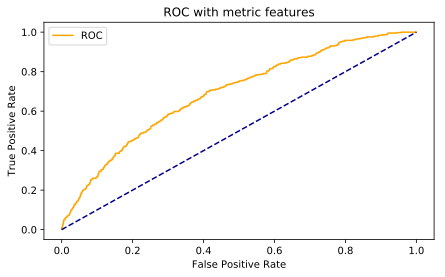

In [335]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

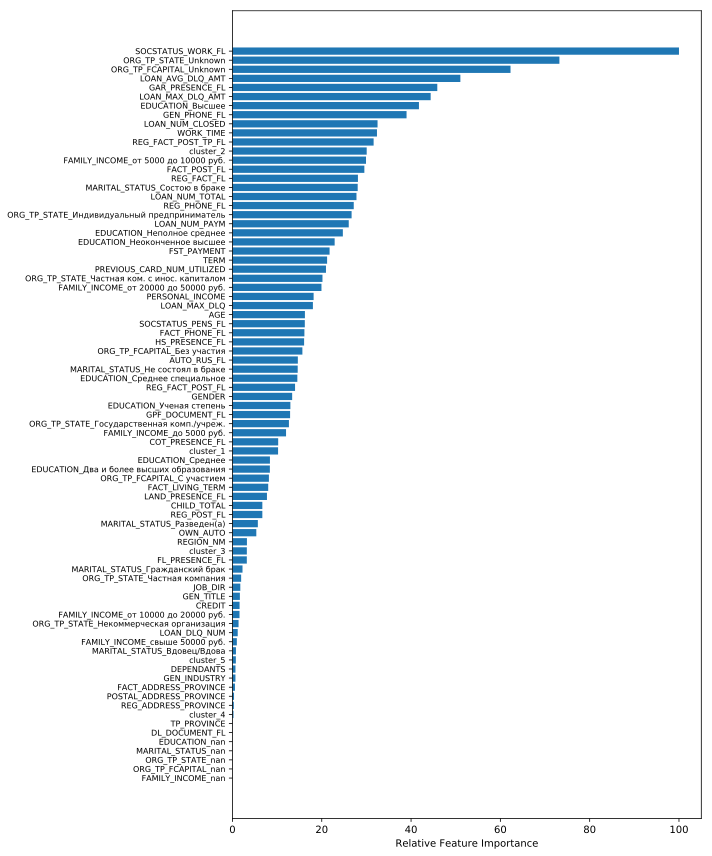

In [337]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   

## Подбор оптимального кол-ва кластеров

In [454]:
without_metric_feats = [col for col in df.columns if col not in ["cluster_"+str(x) for x in range(1,n_clusters+1)]]

In [455]:
df = df[without_metric_feats]

In [456]:
df.shape

(15223, 76)

In [457]:
cluster_features = ['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [458]:
roc_auc_scores = []
for n_clusters in range(1,21):
    metric_features = make_metric_features(n_clusters, cluster_features, df)[1]
    df_new = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.25, random_state=42)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test, y_scores))

In [459]:
roc_auc_scores

[0.691376719725783,
 0.6917217083261598,
 0.6917093174312501,
 0.6902634956410136,
 0.6912599844526877,
 0.6886096372467693,
 0.6887844140802304,
 0.6885607258194946,
 0.688282908912575,
 0.6875277164754556,
 0.6870855571728934,
 0.6873203320238113,
 0.6874266328590881,
 0.6863055829459548,
 0.6870138204128906,
 0.6874507624965437,
 0.687030776374346,
 0.6857369060848424,
 0.6868364349699749,
 0.6868677382834307]

Text(0.5,1,'Зависимость ROC от количества кластеров')

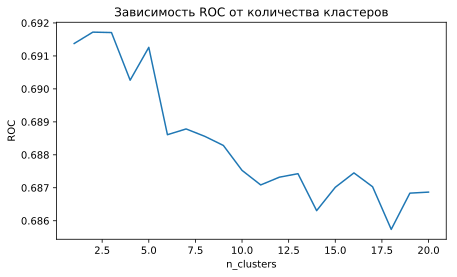

In [460]:
plt.plot([n for n in range(1,len(roc_auc_scores)+1)], roc_auc_scores, label='ROC')
plt.xlabel('n_clusters')
plt.ylabel('ROC')
plt.title('Зависимость ROC от количества кластеров')

## Обучение модели с использованием ОПТИМАЛЬНОГО количества кластеров для построения метрических признаков

In [419]:
df = df[without_metric_feats]

In [420]:
if df.shape == (15223, 76):
    print('Датфрейм не содержит метрические признаки')
else:
    print('Датфрейм содержит метрические признаки')    

Датфрейм не содержит метрические признаки


In [421]:
n_clusters = roc_auc_scores.index(max(roc_auc_scores))+1

In [422]:
n_clusters

2

In [423]:
cluster_centers, metric_features = make_metric_features(n_clusters, cluster_features, df)

In [424]:
df = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [426]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [427]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [434]:
cluster_features, cluster_centers

(['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM'],
 array([[-0.74710446,  0.57478109,  0.1767357 , -0.03311971],
        [ 0.96109187,  0.75713427, -0.22735675,  0.04260593]]))

In [435]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6917217083261598
Gini 0.3834434166523195


In [436]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

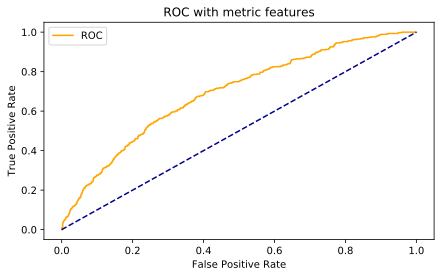

In [437]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

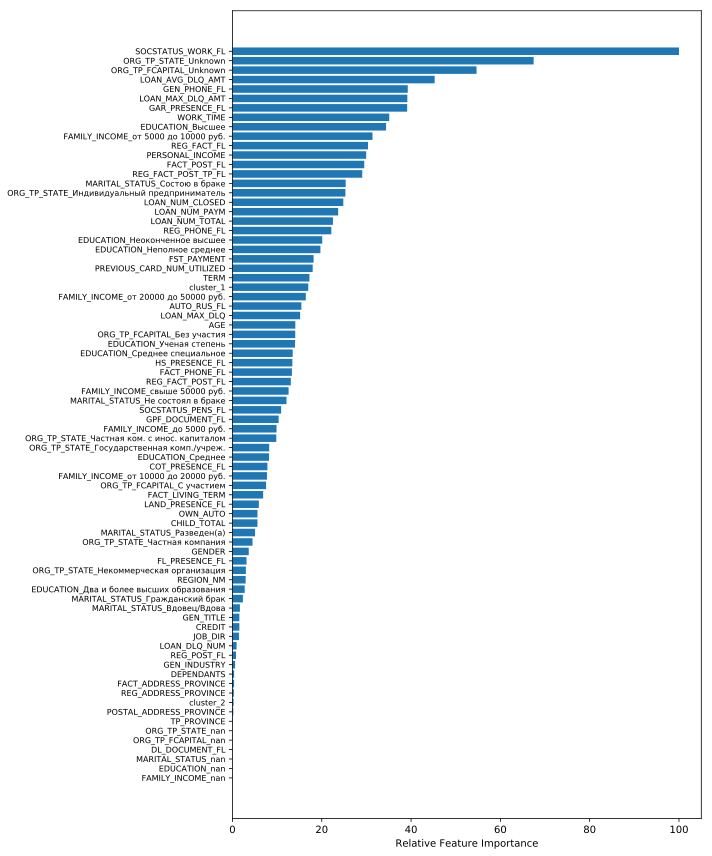

In [438]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()  

## Логистическая регрессия без метрических признаков

In [439]:
without_metric_feats = [col for col in df.columns if col not in ["cluster_"+str(x) for x in range(1,n_clusters+1)]]

In [440]:
len(without_metric_feats)

76

In [441]:
clf_without_mf = LogisticRegression(random_state=0).fit(X_train[without_metric_feats], y_train)

In [442]:
y_scores = clf_without_mf.predict_proba(X_test[without_metric_feats])[:, 1]

In [443]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.689521998403531
Gini 0.379043996807062


In [444]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

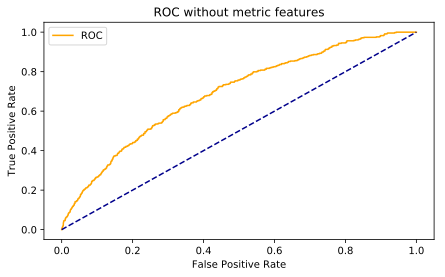

In [445]:
plot_roc_cur(fpr2, tpr2, title='ROC without metric features')